### Importing Necessary Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Data Augmentation 
Using some Data Augmentation techniques for more data and Better results.
    Shearing of images,
    Random zoom,
    Horizontal flips.

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

### Training Set

In [3]:
training_set = train_datagen.flow_from_directory(r'dataset\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Validation Set

In [4]:

test_set = test_datagen.flow_from_directory(r'dataset\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


###  Creating a Sequential model

In [5]:
cnn = Sequential()

### Convolutional Layer 1:
Filters: 32 (number of filters/kernels),
Kernel Size: 3x3 (size of the convolutional filter),
Activation Function: ReLU (Rectified Linear Unit),
Input Shape: (64, 64, 3) (input dimensions for the first layer).

In [6]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Max Pooling Layer 1:
Pool Size: 2x2 (size of the pooling window),
Strides: 2 (step size of the pooling window).

In [7]:
cnn.add(MaxPool2D(pool_size=2, strides=2))

### Convolutional Layer 2:
Filters: 32,
Kernel Size: 3x3,
Activation Function: ReLU,

In [8]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

### Max Pooling Layer 2:
Pool Size: 2x2 (size of the pooling window),
Strides: 2 (step size of the pooling window).

In [9]:
cnn.add(MaxPool2D(pool_size=2, strides=2))

### Flattening Layer:
Converts the 2D feature maps to a 1D vector for input to the Dense layers

In [10]:
cnn.add(Flatten())

### Fully Connected Layer (Dense Layer 1):
Units: 128 (number of neurons in the layer),
Activation Function: ReLU.

In [11]:
cnn.add(Dense(units=128, activation='relu'))

### Output Layer (Dense Layer 2):
Units: 1 (binary classification, hence one output neuron),
Activation Function: Sigmoid (for binary classification).

In [12]:
cnn.add(Dense(units=1, activation='sigmoid'))

### Compiling the CNN:
Optimizer: Adam (popular optimization algorithm),
Loss Function: Binary Crossentropy (suitable for binary classification),
Metrics: Accuracy (evaluation metric).

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN:
x: Training data, provided as a generator (training_set)
validation_data: Validation data, provided as a generator (test_set)
epochs: Number of times the entire training dataset is passed forward and backward through the neural network

In [14]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 41s 162ms/step - loss: 0.6862 - accuracy: 0.5545 - val_loss: 0.6302 - val_accuracy: 0.6590
Epoch 2/25
250/250 [==============================] - 35s 138ms/step - loss: 0.6201 - accuracy: 0.6605 - val_loss: 0.5904 - val_accuracy: 0.6935
Epoch 3/25
250/250 [==============================] - 42s 167ms/step - loss: 0.5658 - accuracy: 0.7107 - val_loss: 0.5395 - val_accuracy: 0.7335
Epoch 4/25
250/250 [==============================] - 39s 155ms/step - loss: 0.5347 - accuracy: 0.7319 - val_loss: 0.5071 - val_accuracy: 0.7545
Epoch 5/25
250/250 [==============================] - 36s 142ms/step - loss: 0.5154 - accuracy: 0.7452 - val_loss: 0.5946 - val_accuracy: 0.6955
Epoch 6/25
250/250 [==============================] - 35s 139ms/step - loss: 0.5005 - accuracy: 0.7599 - val_loss: 0.5003 - val_accuracy: 0.7645
Epoch 7/25
250/250 [==============================] - 35s 142ms/step - loss: 0.4819 - accuracy: 0.7676 - val_loss: 0.4907 - val_ac

### Displaying a summary of the CNN architecture:
Useful for inspecting the layers, parameters, and output shapes of the model

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

### Confusion Matrix

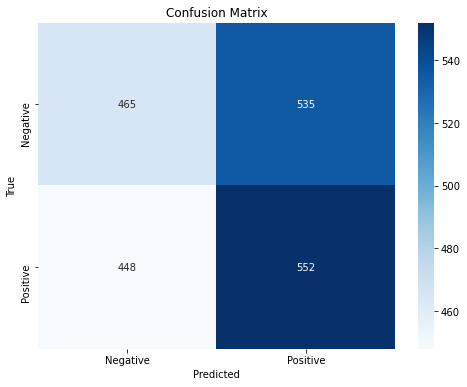

In [16]:
# Make predictions on the test set
predictions = cnn.predict(test_set)
y_pred = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Get true labels
y_true = test_set.classes
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Predictions for any random image

In [21]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r"prediction_image.jpg", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

cat
